# STOR 601: Python assignment (Jarvis march algorithm)

First, define a gift wrap to be a convex hull, in which all points lie inside a convex polygon whose vertices are points of the hull. Therefore, assume that if the point lies on the boundary of the polygon, then it is a part of the gift-wrap (will be demonstrated in examples with collinear points on the hull). Some literature excludes these points as it increases computational complexity, but without prior knowledge a hull may contain collinear points on the hull (collinear points inside the hull are not problematic).

The two ideas outlined are based on angles and lines. For the first one, maximum change in angle is seeked for each iteration until the most left point (or other starting point) is reached. For the second one, we start with left most point and pair with every other to search for lines such that all the points are on one side of the line (there are two such to start with depending on whether we proceed in clockwise (all the points are to the left of (less than) the line) or anti-clockwise direction(all the points are to the right of (more than) the line)). 

Further assumption are floating points, where points are generated from discrete real number scale rather than continuous. Therefore, `truncate` value of $10^{-10}$ is included in the inequality so that the collinear points are not falsely identified outside of the line. The implementation for the collinearity edge case is further explained below pseudo code. 

## Source code

In [6]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance # calculate Euclidean distance 
import plotnine
from plotnine import ggplot,aes,geom_point,geom_line, geom_polygon, geom_boxplot, xlab, ylab
from plotnine.themes import theme_minimal
import time

In [58]:
def convex_hull(x,y):
    X=x.copy()
    Y=y.copy()
    # truncate to tackle imprecise inequalities
    truncate=1e-10
    # prepare lists and find leftmost point as the starting point of the convex hull
    points_x=[]
    points_y=[]
    # append leftmost point (first point in the data as it is already sorted)
    points_x.append(X[0])
    points_y.append(Y[0])
    # remove from x,y
    y.pop(0)
    x.pop(0)
    # create a line and check inequality
    pair=[] 
    for j in range(0,len(x)):
        line_less=[]
        line_greater=[]
        # remove points forming the line as they points on the boundary form convex hull
        for i in range(0,len(X)):
            # check inequality for the line 
            if points_x[-1]-x[j]!=0:
                line_less.append(Y[i]<((points_y[-1]-y[j])/(points_x[-1]-x[j]))*X[i]-x[j]*((points_y[-1]-y[j])/(points_x[-1]-x[j]))+y[j] ) 
                #line_greater.append(Y[i]>((points_y[-1]-y[j])/(points_x[-1]-x[j]))*X[i]-x[j]*((points_y[-1]-y[j])/(points_x[-1]-x[j]))+y[j] +truncate)
            else:
                line_less.append(X[i]<x[j])
                #line_greater.append(X[i]>x[j]+truncate)
        pair.append(sum(line_less))

    # append to convex hull
    
    dist=[]
    for k in range(0,len(pair)):
        if pair[k]==0:
            # calculate Euclidean distance from (points_x[-1],points_y[-1])
            dist.append(distance.euclidean((points_x[-1],points_y[-1]),(x[k],y[k])))
        else:
            # very large distance
            dist.append(10**6)
    new_point=dist.index(min(dist))
    points_x.append(x[new_point])
    points_y.append(y[new_point])
    # remove from x,y
    y.pop(new_point)
    x.pop(new_point)

    
    while (points_x[0]!=points_x[-1]) or (points_y[0]!=points_y[-1]):
        pair=[]
        for j in range(0,len(x)):
            line_less=[]
            line_greater=[]
            # remove points forming the line as they points on the boundary form convex hull
            for i in range(0,len(X)):
                # check inequality for the line 
                if points_x[-1]-x[j]!=0:
                    line_less.append(Y[i]<((points_y[-1]-y[j])/(points_x[-1]-x[j]))*X[i]-x[j]*((points_y[-1]-y[j])/(points_x[-1]-x[j]))+y[j] -truncate) 
                    line_greater.append(Y[i]>((points_y[-1]-y[j])/(points_x[-1]-x[j]))*X[i]-x[j]*((points_y[-1]-y[j])/(points_x[-1]-x[j]))+y[j] +truncate)
                else:
                    line_less.append(X[i]<x[j])
                    line_greater.append(X[i]>x[j])
            pair.append(sum(line_less)*sum(line_greater))

        # append to convex hull
        if pair.count(0)!=0:
            if pair.count(0)>=2: 
                dist=[]
                for k in range(0,len(pair)):
                    if pair[k]==0:
                        # calculate Euclidean distance from (points_x[-1],points_y[-1])
                        dist.append(distance.euclidean((points_x[-1],points_y[-1]),(x[k],y[k])))
                    else:
                        # very large distance
                        dist.append(10**6)
                new_point=dist.index(min(dist))
                points_x.append(x[new_point])
                points_y.append(y[new_point])
                # remove from x,y
                y.pop(new_point)
                x.pop(new_point)
            else:
                new_point=pair.index(0)
                points_x.append(x[new_point])
                points_y.append(y[new_point])
                # remove from x,y
                x.pop(new_point)
                y.pop(new_point)
        else:
            new_point=0
            points_x.append(points_x[new_point])
            points_y.append(points_y[new_point])
            
    return points_x,points_y

## Produce correct output for datasets provided

### Random

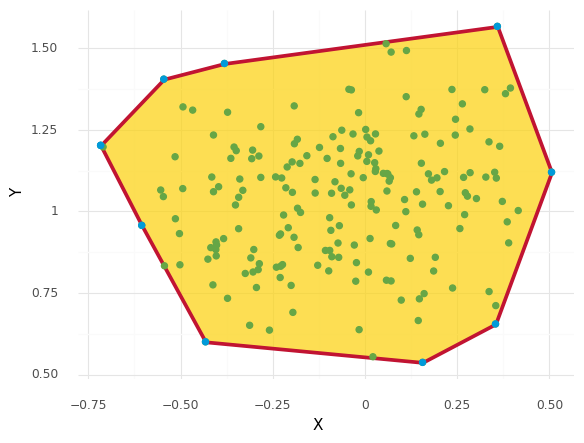


          X         Y
0 -0.716574  1.202197
1 -0.605200  0.957134
2 -0.432249  0.600185
3  0.156197  0.537196
4  0.353922  0.654945
5  0.505824  1.120013
6  0.358984  1.566773
7 -0.380952  1.453105
8 -0.545292  1.405037
9 -0.716574  1.202197


(None, None)

In [60]:
df=pd.read_csv('random.csv',header=None,names=['X','Y']).sort_values(by=['X','Y'],ascending=[True,False])
def plot_hull(df):
    x=df['X'].values.tolist()
    y=df['Y'].values.tolist()
    hull=convex_hull(x,y)
    hull_df=pd.DataFrame(list(zip(hull[0],hull[1])),columns=['X','Y'])
    # define some nice colours (Basquiat)
    red='#C11432'
    blue='#009ADA'
    green='#66A646'
    yellow='#FDD10A'
    p=ggplot() 
    p=p + geom_polygon(hull_df,aes(x='X',y='Y'),alpha=0.7,color=red,fill=yellow,size=1.5)
    p=p + geom_point(df,aes(x='X',y='Y'),color=green,size=2) 
    p=p + geom_point(hull_df,aes(x='X',y='Y'),color=blue,size=2) 
    p=p + theme_minimal()
    return print(p),print(hull_df)
plot_hull(df)

### Square

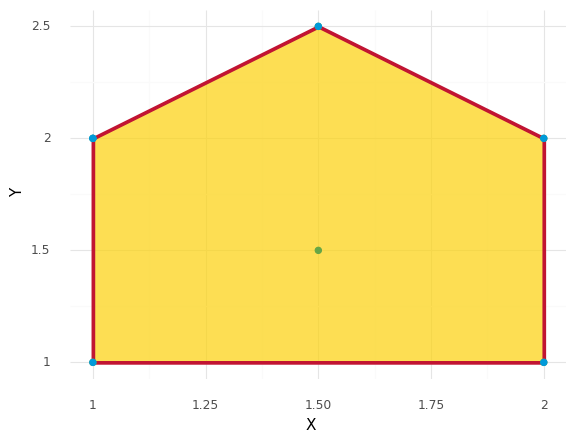

In [39]:
df=pd.read_csv('square.csv',header=None,names=['X','Y']).sort_values(by=['X','Y'],ascending=[True,False])
plot_hull(df)

### Line

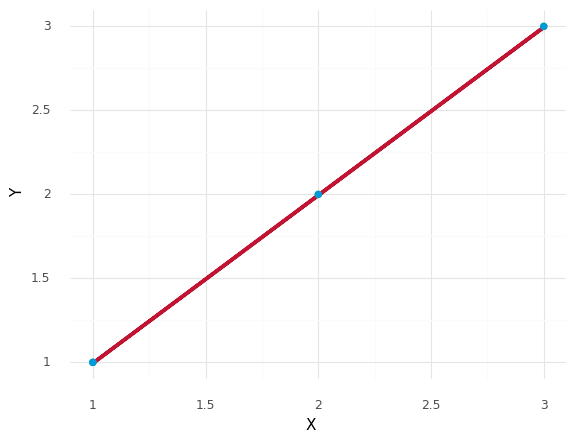

In [40]:
df=pd.read_csv('line.csv',header=None,names=['X','Y']).sort_values(by=['X','Y'],ascending=[True,False])
plot_hull(df)

### Pgram

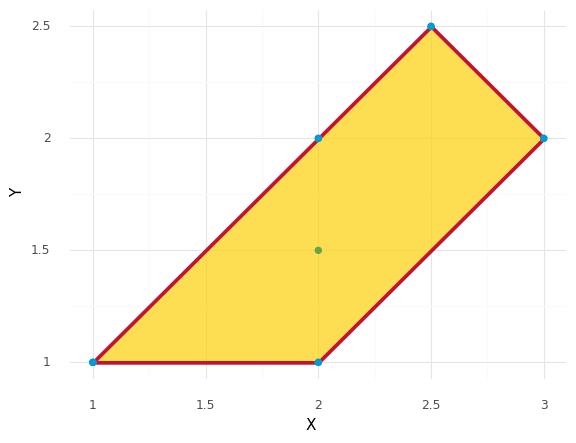

In [41]:
df=pd.read_csv('pgram.csv',header=None,names=['X','Y']).sort_values(by=['X','Y'],ascending=[True,False])
plot_hull(df)

### Pines

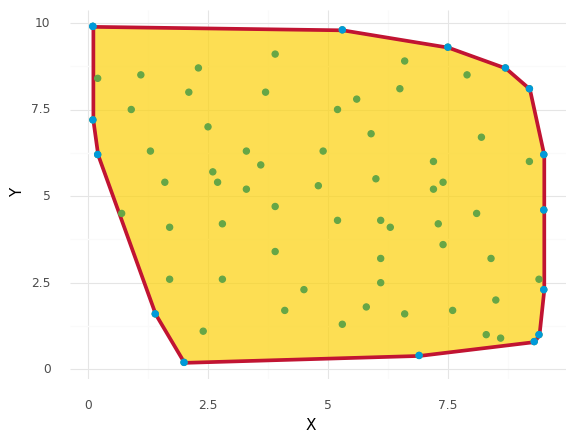


      X    Y
0   0.1  9.9
1   0.1  7.2
2   0.2  6.2
3   1.4  1.6
4   2.0  0.2
5   6.9  0.4
6   9.3  0.8
7   9.4  1.0
8   9.5  2.3
9   9.5  4.6
10  9.5  6.2
11  9.2  8.1
12  8.7  8.7
13  7.5  9.3
14  5.3  9.8
15  0.1  9.9


(None, None)

In [65]:
df=pd.read_csv('pines.csv',header=None,names=['X','Y']).sort_values(by=['X','Y'],ascending=[True,False])
plot_hull(df)

## Pseudo code

<img src="STOR_601_Python.jpg" alt="Alternative text" />

The algorithm assumes two lists $x$ and $y$ as input, that are ordered by $x$ ascending first, then $y$ descending second if there are several points with identical $x$ coordinates. Therefore, the leftmost (and topmost) point is given with index $0$. Then, it should be noted that in case of no collinearity, there is exactly one point that satisfies the above algorithm such that the line defined by the leftmost point and this point has all the other points larger than this line and corresponds to anticlockwise direction. As expected, the opposite inequality in finding second point would result in clockwise direction. In a special case of collinearity, there will be several $0$ $line\_values$ and the closest corresponding point will be picked by calculating Euclidean distance (not included in pseudo code). 

Compared with the algorithm given in assessment, the pseado code above provides more detail. The notation is different such that $p$ is the last item in the hull up to a given iteration of *while* loop and $q$ corresponds with $test\_point$ for which $line_value$ is $0$. The pseudo code in the assessment does not discuss pathological cases such as duplicates and collinearity, which were removed and included respectively in the code. Finally, the code does not use triple vector product but the points of the hull added anticlockwise satisfy this definition.

## Pathological (edge) cases


### Vertical straight line

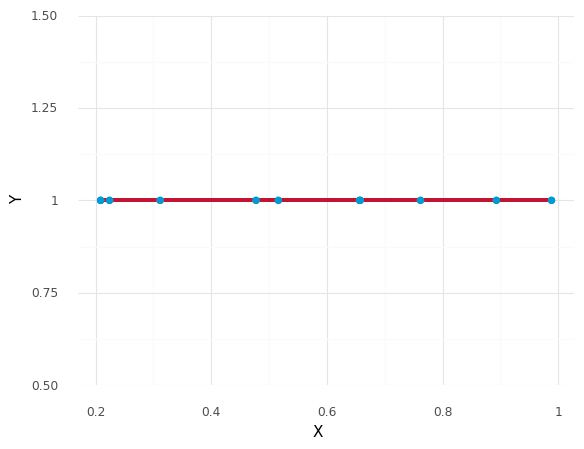

([0.2087002160690773,
  0.22417688803286762,
  0.31164134558789514,
  0.4774441310818385,
  0.515993419312482,
  0.6563529990849304,
  0.6575681032901352,
  0.7617337721184594,
  0.8929670883162497,
  0.9883218949911452,
  0.2087002160690773],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
random.seed(1)
y=[1]*10
x=np.random.random((10,)).tolist()
df = pd.DataFrame({'X' : x,'Y' : y})
plot_hull(df)

### Horizontal straight line

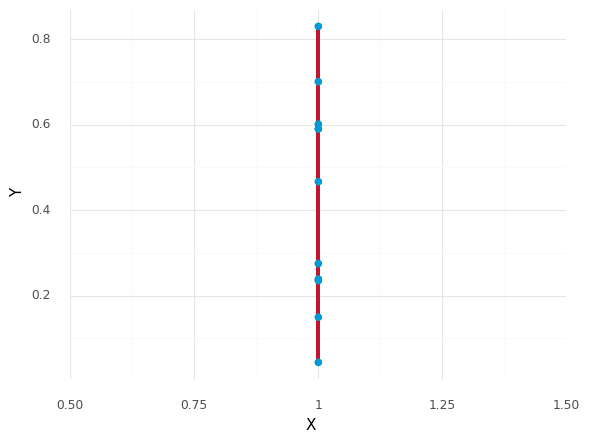

In [28]:
random.seed(1)
x=[1]*10
y=np.random.random((10,)).tolist()
df = pd.DataFrame({'X' : x,'Y' : y})
plot_hull(df)

### Square with collinearity on the convex hull I.

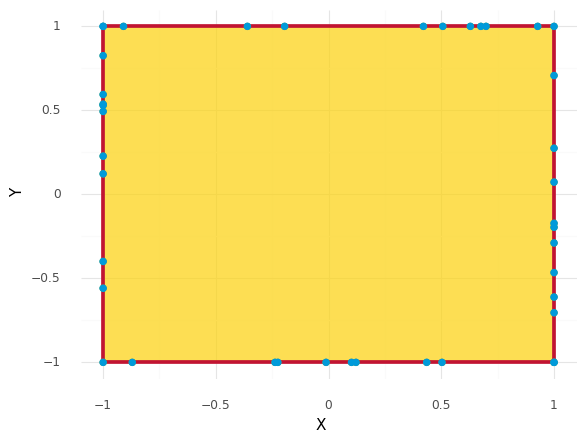

In [29]:
random.seed(1)
x=[-1]*11 + np.random.uniform(-1,1,9).tolist() + [1]*11 + np.random.uniform(-1,1,9).tolist()
y=[1] + np.random.uniform(-1,1,9).tolist() + [-1]*11 + np.random.uniform(-1,1,9).tolist() + [1]*10
df = pd.DataFrame(list(zip(x, y)),columns =['X', 'Y'])
df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
plot_hull(df)

### Square with collinearity on the convex hull II.

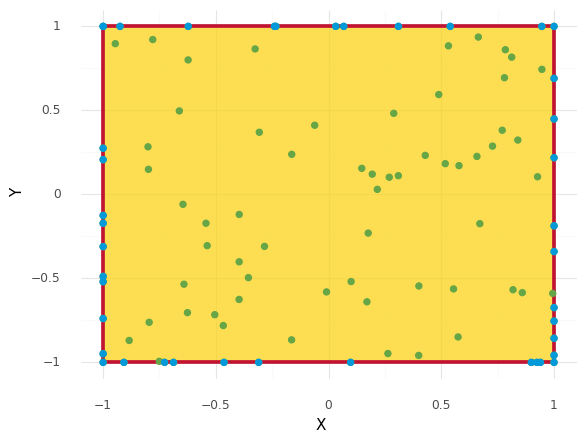

In [30]:
# add 60 random points inside the square
random.seed(1)
x=[-1]*11 + np.random.uniform(-1,1,9).tolist() + [1]*11 + np.random.uniform(-1,1,9).tolist() + np.random.uniform(-1,1,60).tolist()
y=[1] + np.random.uniform(-1,1,9).tolist() + [-1]*11 + np.random.uniform(-1,1,9).tolist() + [1]*10 + np.random.uniform(-1,1,60).tolist()
df = pd.DataFrame(list(zip(x, y)),columns =['X', 'Y'])
df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
plot_hull(df)

### Pine tree

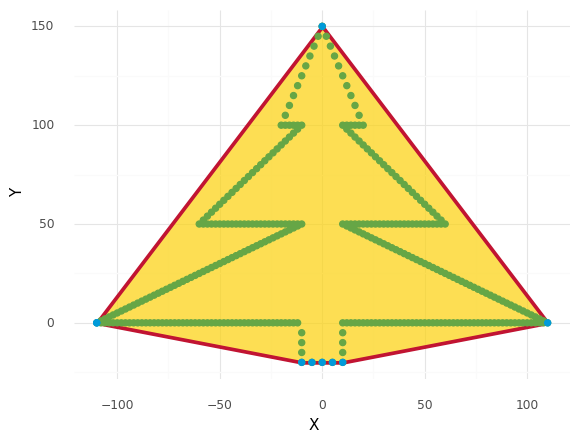

In [31]:
random.seed(1)
x=list(range(0,20,2)) + list(range(20,10,-2)) + list(range(10,60,2)) + list(range(60,10,-2)) + list(range(10,110,2)) + list(range(110,10,-2)) + [10]*4 + list(range(10,-10,-5)) + [-10]*4 + list(range(0,-20,-2)) + list(range(-20,-10,2)) + list(range(-10,-60,-2)) + list(range(-60,-10,2)) + list(range(-10,-110,-2)) + list(range(-110,-10,2)) 
y=list(range(150,100,-5)) + [100]*5 + list(range(100,50,-2)) + [50]*25 + list(range(50,0,-1)) + [0]*50 + list(range(0,-20,-5)) + [-20]*4 + list(range(-20,0,5)) + list(range(150,100,-5)) + [100]*5 + list(range(100,50,-2)) + [50]*25 + list(range(50,0,-1)) + [0]*50
len(x),len(y)
df = pd.DataFrame(list(zip(x, y)),columns =['X', 'Y'])
df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
plot_hull(df)

## Computational complexity

There are many possible cases that could be tested empirically. Jarvis introduced algorithm of $O(nh)$ (cite 1973 paper), but since then better algorithms were made with optimal ones with $O(log(n)h)$. However, such algorithm does not follow the pseudocode prescribed since it does not look for ordered points in a given direction. The algorithm given above is not optimal, but uses simple steps directly implied from the definition of a convex polygon.

Ordering the points is excluded from the algorithm as it is a part of the assumptions about the input data. Due to the structures used (Python list), it is $O(n)$ to find the leftmost element. Then, finding the second point is of order $(n-1)n$.

Then the while loop is performed $(h-1)$ iterations (not $(h-2)$ as the first point is doubled at the end which closes the loop) so the total complexity is

$$
O\left(\sum_{i=1}^{h} n\left(n-i\right)\right) + O\left(n\right).
$$

In asymptotic approximation, the second term can be dropped and the first one becomes

$$
O(n^2h).
$$

We run $10$, $100$ and $1000$ randomly generated points in $100$ macroreplications each to calculate runtimes and the number of points in the convex hull.

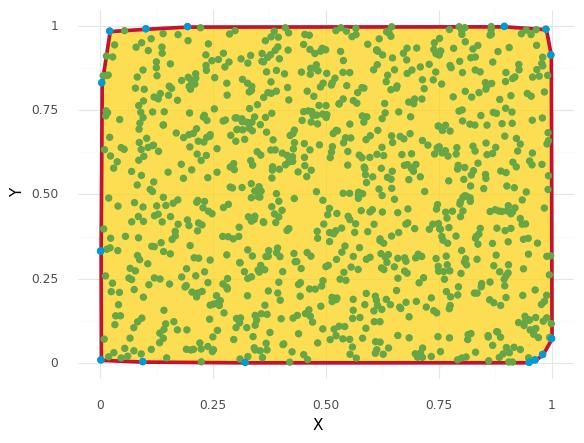

In [513]:
random.seed(1)
x=np.random.random((1000,)).tolist()
y=np.random.random((1000,)).tolist()
df = pd.DataFrame({'X' : x,'Y' : y})
df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
plot_hull(df)

In [404]:
run_time=[] #to record runtime of iteration
hull_number=[] #to record number of points in the convex hull
for i in range(0,100):
    # run the above example hundred times and record number of points in the hull and the time
    random.seed(i)
    x=np.random.random((1000,)).tolist()
    y=np.random.random((1000,)).tolist()
    df = pd.DataFrame({'X' : x,'Y' : y})
    df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
    x=df['X'].values.tolist()
    y=df['Y'].values.tolist()

    start=time.time()
    hull=convex_hull(x,y)

    end=time.time()
    run_time.append(end-start)
    hull_number.append(len(hull[0])-1) #count the first and last point of the hull only once

In [520]:
run_time100=[] #to record runtime of iteration
hull_number100=[] #to record number of points in the convex hull
for i in range(0,100):
    # run the above example hundred times and record number of points in the hull and the time
    random.seed(i)
    x=np.random.random((100,)).tolist()
    y=np.random.random((100,)).tolist()
    df = pd.DataFrame({'X' : x,'Y' : y})
    df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
    x=df['X'].values.tolist()
    y=df['Y'].values.tolist()

    start=time.time()
    hull=convex_hull(x,y)

    end=time.time()
    run_time100.append(end-start)
    hull_number100.append(len(hull[0])-1) #count the first and last point of the hull only once

In [516]:
run_time10=[] #to record runtime of iteration
hull_number10=[] #to record number of points in the convex hull
for i in range(0,100):
    # run the above example hundred times and record number of points in the hull and the time
    random.seed(i)
    x=np.random.random((10,)).tolist()
    y=np.random.random((10,)).tolist()
    df = pd.DataFrame({'X' : x,'Y' : y})
    df=df.sort_values(by=['X','Y'],ascending=[True,False]) # order the points
    x=df['X'].values.tolist()
    y=df['Y'].values.tolist()

    start=time.time()
    hull=convex_hull(x,y)

    end=time.time()
    run_time10.append(end-start)
    hull_number10.append(len(hull[0])-1) #count the first and last point of the hull only once

In [462]:
runs=run_time10 + run_time100 + run_time
hulls=hull_number10 + hull_number100 + hull_number
number_of_points=["10"]*100 + ["100"]*100 + ["1000"]*100
runs_log=np.log10(runs)
complexity=pd.DataFrame(list(zip(runs,runs_log,hulls,number_of_points)),columns=['runs','runs_log','hulls','number_of_points'])
complexity.head()

,runs,runs_log,hulls,number_of_points
0,0.000530,-3.275525,5,10
1,0.000452,-3.345051,5,10
2,0.000491,-3.308582,6,10
3,0.000489,-3.310694,6,10
4,0.000561,-3.251038,8,10


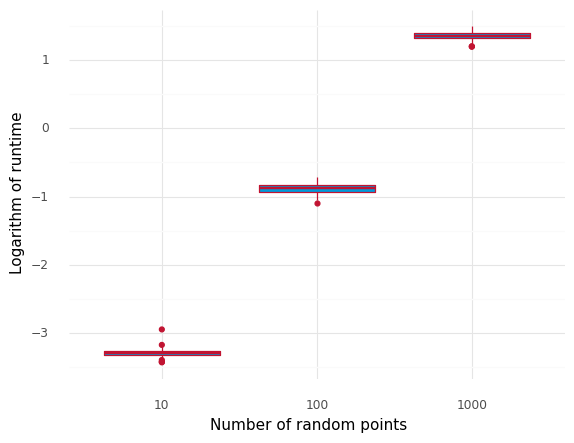

In [521]:
p= ggplot(complexity,aes(x=number_of_points,y=runs_log)) + geom_boxplot(color=red,fill=blue)
p=p + xlab("Number of random points") + ylab("Logarithm of runtime")
p=p + theme_minimal()
print(p)

Boxplots grow linearly with exponential scale on $x$ axis and logarithmic scale on $y$ axis. 

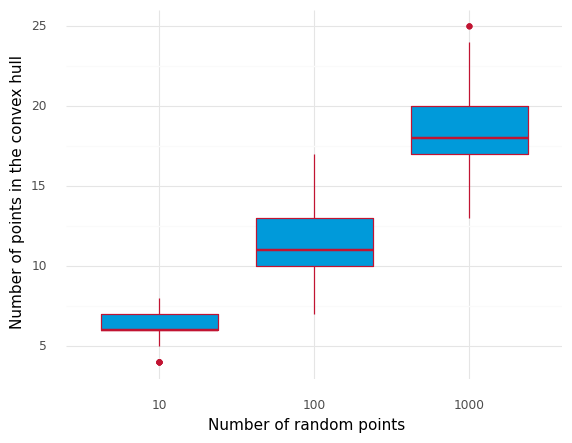


Respective means are  6.21 , 11.95 and 18.18 .


In [522]:
p= ggplot(complexity,aes(x=number_of_points,y=hulls)) + geom_boxplot(color=red,fill=blue)
p=p + xlab("Number of random points") + ylab("Number of points in the convex hull")
p=p + theme_minimal()
print(p)
print("Respective means are ",np.mean(hull_number10),",",np.mean(hull_number100),"and",np.mean(hull_number),".")

In [523]:
# assume algorithm is O(n^2h)
scale_from_10=np.mean(run_time10)/np.mean(hull_number10)
print(np.mean(run_time10),np.mean(run_time100),np.mean(run_time))
print(np.mean(run_time10),scale_from_10*100*np.mean(hull_number100),scale_from_10*10000*np.mean(hull_number))

0.0005652689933776855 0.13730382680892944 22.314519610404968
0.0005652689933776855 0.10877559534401517 16.54845458873804


We can observe that if the algorithm scales quadratically with the number of randomly generated points (eg. multiply by $10^4$ when number of points is $10^2$ times larger)  and linearly with the number of points on the hull, then we get reasonable estimates for runtime up to a constant of proportionality.

# Five R's


The code is replicable and the Jarvis march function can be run on Python 3.9.10. The environment is developed by Dan Grose and can be supplied upon request listing all version of dependencies, so the code can be re-run. Each randomly generated point sample depends on a seed to ensure repeatability of the results. Since execution environment is known, the code will produce same output across different machines (reproducibility). Finally, this document outlines the input requirements (two ordered lists of $x$ and $y$ coordinates, with collinearity allowed but no duplicates), documents code via inline comments, pseudo code, examples of random points, demonstration of pathological cases and markdown description of input and output. Plotting is also standardized by a function to ensure coherent visualisations across the document.

# Bibliography

Jarvis, R. (1973). On the identification of the convex hull of a finite set of points in the plane.
*Information Processing Letters*.

Benureau, F. and Rougier, N. (2018). Re-run, Repeat, Reproduce, Reuse, Replicate: Transforming Code into Scientific Contributions. *Frontiers in neuroinformatics*.
